<a href="https://colab.research.google.com/github/chilaact/quality-predict-mining-process/blob/iqbal-branch/Quality_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Use seaborn for pairplot
!pip install -q seaborn

# Use some functions from tensorflow_docs
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
# Importing some useful modules

from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
#Importing TensorFlow 2.x

%tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)

2.1.0


In [0]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
#Load the Data
data = pd.read_csv("/content/drive/My Drive/Quality_Prediction/MiningProcess_Flotation_Plant_Database.csv",
                   decimal=",",parse_dates=["date"],infer_datetime_format=True).drop_duplicates()

In [38]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [39]:
data.isna().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [58]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
% Iron Feed,736282.0,56.298307,5.160365,42.740000,52.670000,56.08000,59.72000,65.78000
% Silica Feed,736282.0,14.648984,6.810741,1.310000,8.940000,13.85000,19.60000,33.40000
Starch Flow,736282.0,2869.636615,1216.017896,0.002026,2075.070000,3020.23000,3728.93000,6300.23000
Amina Flow,736282.0,488.165523,91.254428,241.669000,431.835848,504.35250,553.33575,739.53800
Ore Pulp Flow,736282.0,397.570736,9.705444,376.249000,394.248000,399.23800,402.96700,418.64100
Ore Pulp pH,736282.0,9.767315,0.387176,8.753340,9.527050,9.79746,10.03780,10.80810
Ore Pulp Density,736282.0,1.680424,0.069206,1.519820,1.647390,1.69758,1.72838,1.85325
Flotation Column 01 Air Flow,736282.0,280.119813,29.633831,175.510000,250.278000,299.34100,300.14700,373.87100
Flotation Column 02 Air Flow,736282.0,277.121249,30.157126,175.156000,250.448000,296.20200,300.68600,375.99200
Flotation Column 03 Air Flow,736282.0,281.052538,28.571077,176.469000,250.847000,298.69000,300.38500,364.34600


In [0]:
#Do some pre-processing
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler as mms

no_date_data = data.drop('date', axis=1)

y = no_date_data['% Silica Concentrate']
X = no_date_data.drop('% Silica Concentrate', axis=1)

X_train, X_test, y_train, y_test = tts(X, y, random_state=100)

In [49]:
X_train.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
122061,53.51,16.52,2361.33,520.323,398.755000,9.92006,1.71011,249.829,250.811,249.821,302.022512,299.475698,250.049,249.936,607.115,589.020,607.274,440.497,403.235,437.706,381.295,64.580000
40590,59.72,9.22,2381.64,554.943,400.543000,9.16610,1.75153,200.049,200.220,200.170,295.096000,306.400000,249.927,250.391,799.890,798.818,789.479,449.790,460.089,457.258,440.961,64.030000
629574,54.91,14.99,4220.70,508.043,417.210667,10.13820,1.72095,300.366,298.817,298.753,303.397167,300.125000,366.308,349.734,485.342,474.747,481.583,504.292,369.653,636.471,481.942,65.740000
548738,57.46,10.80,4307.21,517.853,409.913000,10.45350,1.70954,251.082,300.372,299.680,299.789000,302.575000,310.319,305.854,499.287,467.115,479.553,420.850,383.303,403.129,382.272,64.780000
720164,56.20,12.28,3766.77,649.843,408.592000,9.47186,1.74888,298.208,294.062,298.828,299.578000,295.129000,305.642,295.361,432.798,475.445,398.626,349.391,336.835,371.605,399.657,63.664933


In [0]:
#Scaling the features

scaler = mms()

X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)

X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns,index=X_test.index)

In [52]:
X_train.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
122061,0.467448,0.473979,0.374800,0.559749,0.530902,0.567807,0.570741,0.374665,0.376751,0.390426,0.718121,0.548374,0.332195,0.344632,0.642189,0.611914,0.632448,0.537087,0.464450,0.518925,0.425024,0.424497
40590,0.736979,0.246494,0.378024,0.629292,0.573080,0.200868,0.694973,0.123709,0.124815,0.126152,0.210796,0.838082,0.331521,0.347083,0.912551,0.951305,0.872013,0.555022,0.576224,0.554942,0.548161,0.332215
629574,0.528212,0.426301,0.669928,0.535081,0.966259,0.673972,0.603254,0.629438,0.615814,0.650873,0.818807,0.575541,0.974577,0.882250,0.471406,0.427054,0.467188,0.660206,0.398429,0.885071,0.632736,0.619128
548738,0.638889,0.295731,0.683659,0.554787,0.794112,0.827423,0.569032,0.380982,0.623558,0.655807,0.554530,0.678047,0.665213,0.645865,0.490963,0.414707,0.464519,0.499170,0.425264,0.455230,0.427041,0.458054
720164,0.584201,0.341851,0.597878,0.819923,0.762951,0.349676,0.687025,0.618559,0.592135,0.651272,0.539076,0.366512,0.639371,0.589339,0.397714,0.428183,0.358116,0.361260,0.333909,0.397160,0.462919,0.270962


In [0]:
#building the model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.columns)]),
                             tf.keras.layers.Dense(64, activation=tf.nn.relu),
                             tf.keras.layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['mae', 'mse'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1472      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,697
Trainable params: 5,697
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(
  X_train, y_train,
  epochs=1000, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.3273,  mae:0.4211,  mse:0.3273,  val_loss:0.2694,  val_mae:0.3805,  val_mse:0.2694,  
..........

KeyboardInterrupt: ignored

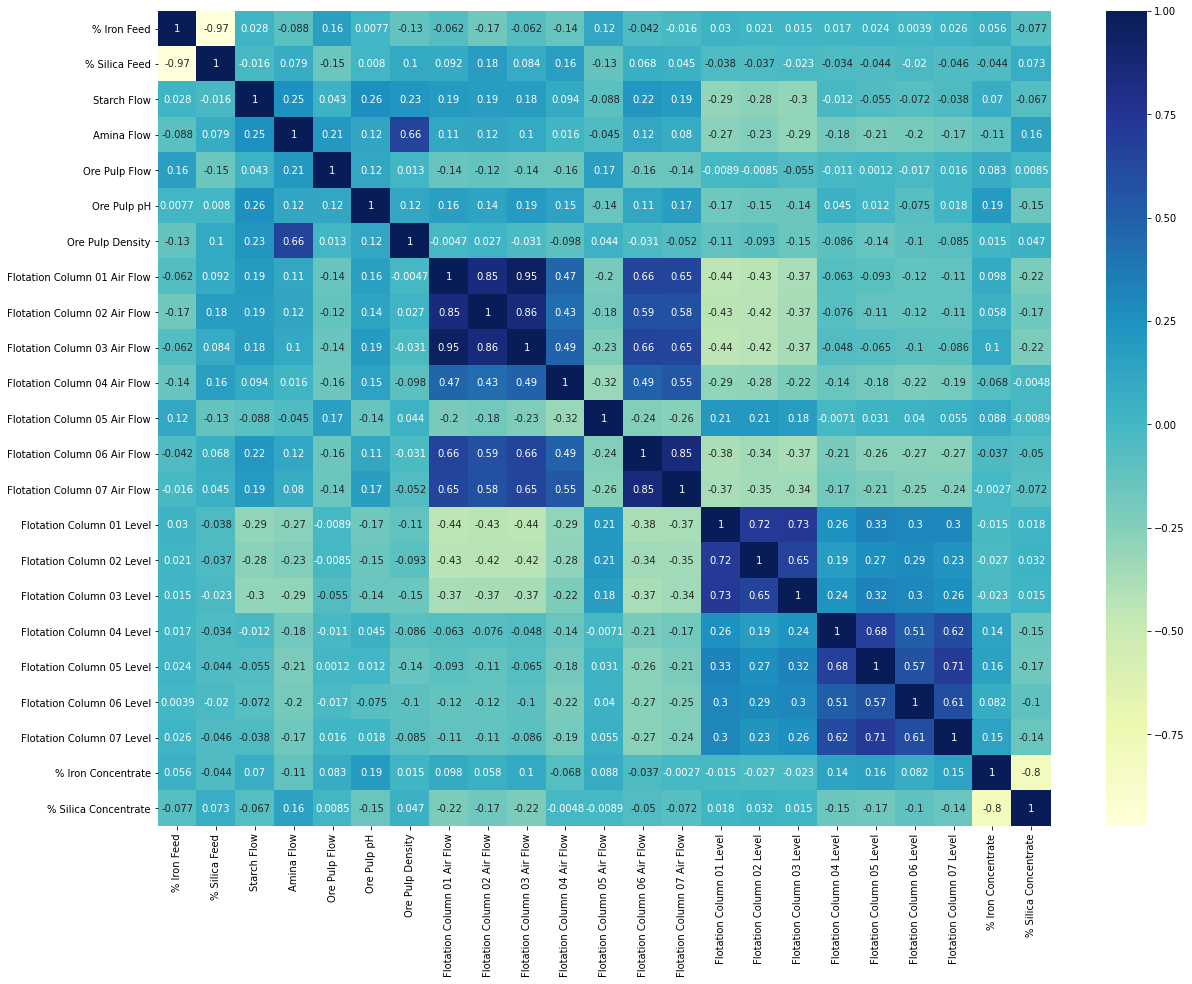

In [40]:
plt.figure(figsize=(20, 15))
correlation = sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)